In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [26]:
X=6*np.random.randn(100,1)-3
y=0.5*(X**2) + 1.5*X + 2 + np.random.randn(100,1)

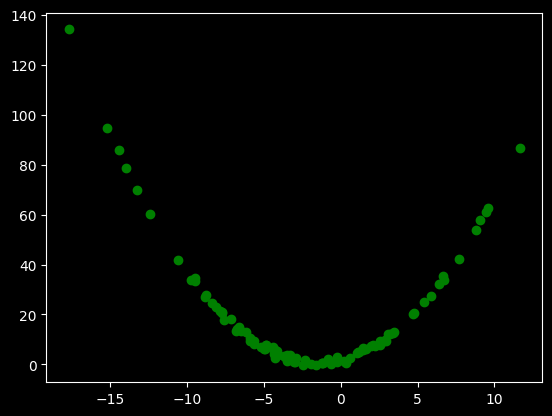

In [27]:
plt.scatter(X,y,color='g')

In [28]:
model=LinearRegression(n_jobs=-1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
X_test=scaler.transform(X_test)

In [33]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [34]:
y_pred=model.predict(X_train)

Text(0, 0.5, 'Exam Score')

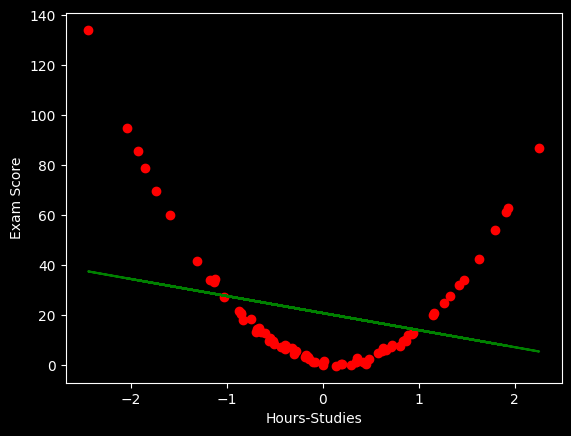

In [35]:
plt.scatter(X_train,y_train,color='r')
plt.plot(X_train,y_pred,color='g')
plt.xlabel("Hours-Studies")
plt.ylabel("Exam Score")

In [36]:
r2=r2_score(y_train,y_pred)

In [37]:
r2

0.06755075579422021

In [38]:
poly=PolynomialFeatures(degree=2, include_bias=True)
x_poly_train=poly.fit_transform(X_train)
x_poly_test=poly.transform(X_test)
x_poly_train_scaled=scaler.fit_transform(x_poly_train)
x_poly_test_scaled=scaler.transform(x_poly_test)

In [39]:
model.fit(x_poly_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [40]:
y_pred=model.predict(x_poly_test_scaled)

In [41]:
score=r2_score(y_test,y_pred)

In [42]:
score

0.9956320067045407

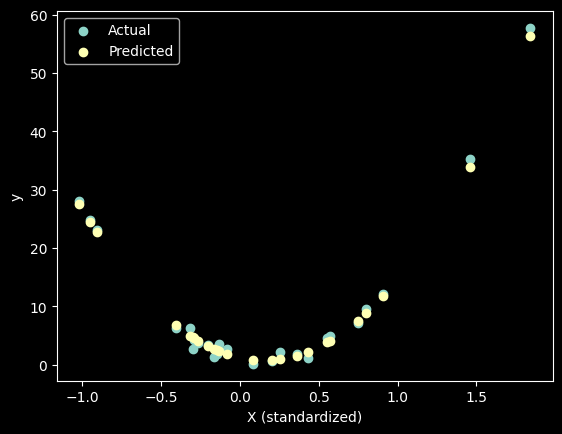

In [43]:
# Use the original feature for x-axis (column 1 of x_poly_test)
plt.scatter(x_poly_test_scaled[:, 1], y_test, label='Actual')
plt.scatter(x_poly_test_scaled[:, 1], y_pred, label='Predicted')
plt.xlabel('X (standardized)')
plt.ylabel('y')
plt.legend()
plt.show()